# DIP Lab 4: Connected Component Algorithm

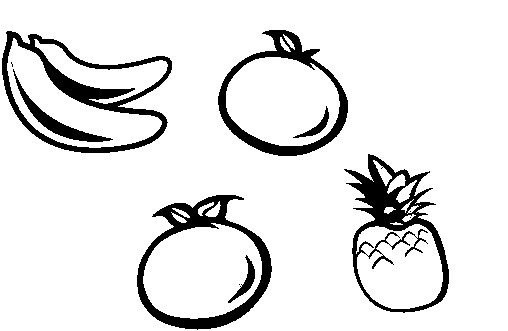

In [1]:
# Binarize Image
from PIL import Image, ImageDraw

image = Image.open('Lab4-image.png')
image = image.convert('L').point(lambda x : 255 if x > 127 else 0, mode='1')
image

In [2]:
# First Pass
from collections import defaultdict
from matplotlib import pyplot as plt

label = defaultdict(int)
equivalence = defaultdict(int)
label_count = 1

width, height = image.size

for y in range(0, height):
    for x in range(0, width):
        
        # ignore white pixels
        if image.getpixel((x,y)) is 255:
            pass
        
        # both top and left pixels have labels 
        elif (x-1,y) in label and (x,y-1) in label:
            label[(x,y)] = min(label[(x-1,y)],label[(x,y-1)])
            equivalence[max(label[(x-1,y)],label[(x,y-1)])] = min(label[(x-1,y)],label[(x,y-1)])
        
        # only left pixel has label
        elif (x-1,y) in label and (x,y-1) not in label:
            label[(x,y)] = label[(x-1,y)]
        
        # only top pixel has label
        elif (x-1,y) not in label and (x,y-1) in label:
            label[(x,y)] = label[(x,y-1)]
        
        # no label on top and left pixel
        else:
            label[(x,y)] = label_count
            label_count += 1
print(label)
equivalence

defaultdict(<class 'int'>, {(269, 30): 1, (270, 30): 1, (271, 30): 1, (272, 30): 1, (273, 30): 1, (274, 30): 1, (275, 30): 1, (276, 30): 1, (277, 30): 1, (278, 30): 1, (279, 30): 1, (280, 30): 1, (281, 30): 1, (282, 30): 1, (283, 30): 1, (284, 30): 1, (285, 30): 1, (7, 31): 2, (8, 31): 2, (9, 31): 2, (10, 31): 2, (11, 31): 2, (265, 31): 3, (266, 31): 3, (267, 31): 3, (268, 31): 3, (269, 31): 1, (270, 31): 1, (271, 31): 1, (272, 31): 1, (273, 31): 1, (274, 31): 1, (275, 31): 1, (276, 31): 1, (277, 31): 1, (278, 31): 1, (279, 31): 1, (280, 31): 1, (281, 31): 1, (282, 31): 1, (283, 31): 1, (284, 31): 1, (285, 31): 1, (286, 31): 1, (287, 31): 1, (288, 31): 1, (6, 32): 4, (7, 32): 2, (8, 32): 2, (9, 32): 2, (10, 32): 2, (11, 32): 2, (12, 32): 2, (13, 32): 2, (14, 32): 2, (15, 32): 2, (263, 32): 5, (264, 32): 5, (265, 32): 3, (266, 32): 3, (267, 32): 3, (268, 32): 3, (269, 32): 1, (270, 32): 1, (271, 32): 1, (272, 32): 1, (273, 32): 1, (274, 32): 1, (275, 32): 1, (276, 32): 1, (277, 32): 1, 

defaultdict(int,
            {3: 1,
             1: 1,
             4: 2,
             2: 2,
             5: 3,
             6: 5,
             8: 7,
             7: 7,
             9: 9,
             10: 9,
             12: 10,
             13: 1,
             11: 1,
             14: 1,
             15: 1,
             16: 16,
             17: 12,
             18: 18,
             19: 19,
             20: 20,
             22: 22,
             23: 23,
             21: 21,
             24: 24,
             25: 17,
             26: 26,
             27: 27,
             28: 28,
             29: 27,
             30: 30,
             31: 31,
             32: 7,
             33: 31,
             35: 7,
             36: 36,
             37: 7,
             38: 36,
             40: 7,
             41: 38,
             42: 41,
             43: 43,
             44: 21,
             45: 43,
             46: 45,
             48: 46,
             49: 44,
             50: 48,
             51: 50,
  

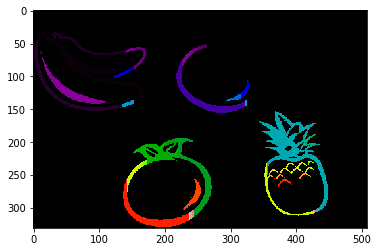

In [20]:
# Second Pass
import numpy as np

# Changing labels according to equivalence defined
for key, value in label.items():
    if value in equivalence:
        label[key] = equivalence[value]

# Creating numpy matrix
labels = np.zeros((height,width),np.int32)
for key,value in label.items():
    labels[key[1],key[0]] = value

# Plotting the labels
plt.imshow(labels, cmap="nipy_spectral")